


### Data Science Research questions
1. **What are the Most Common Brewery Types in San Diego?**
2. **What are the top 5 states with the highest temperatures in the summer?**
3. **What are the top 5 states with the highest alcohol use disorders for ages 18-25 in 2018?**



### Sources"
- Open Brewery DB : https://api.openbrewerydb.org/breweries
- Current Results - Weather and Science Facts : https://www.currentresults.com/Weather/US/average-state-temperatures-in-summer.php
- Drug Dataset : https://corgis-edu.github.io/corgis/csv/drugs/

In [225]:
# Importing all the necessary modules for the rest of the project
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [275]:
# URL of the webpage to get information
url = "https://api.openbrewerydb.org/breweries"

# Specifies which city getting information from
params = {
    "by_city": "San Diego"
}

response = requests.get(url, params=params)
data = response.json()

# Extracting the types of each brewery from the API
types = [brewery['brewery_type'] for brewery in data]

# Counting the occurrences of each brewery type
type_counts = {brewery_type: types.count(brewery_type) for brewery_type in set(types)}

# Sorting the brewery types by frequency in descending order
sorted_type_counts = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)

# Displays the most common brewery types in the specified city
print("Most Common Brewery Types in San Diego:")
for brewery_type, count in sorted_type_counts:
    print(f"{brewery_type.capitalize()}: {count}")

Most Common Brewery Types in San Diego:
Micro: 20
Brewpub: 11
Closed: 6
Large: 5
Regional: 4
Planning: 3
Contract: 1


In [277]:
# URL of the webpage to scrape it
url = "https://www.currentresults.com/Weather/US/average-state-temperatures-in-summer.php"

# Sending GET request to get the webpage content
response = requests.get(url)

# Checking if the response works
if response.status_code == 200: 
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"class": "articletable tablecol-1-left"})
    
    if not table:
        print("Table not found.")
    else:
         # Finding all rows in the table
        rows = table.find_all("tr")
        # Initializing an empty list
        temperatures = []

        # Iterating through each row to get the state and temperature data
        for row in rows[1:]:  
            cols = row.find_all("td")
            if len(cols) > 1:
                state = cols[0].text.strip()
                temperature_str = cols[1].text.strip()
                try:
                    temperature = float(temperature_str)
                    temperatures.append((state, temperature))
                except ValueError:
                    print(f"Skipping invalid data for {state}: {temperature_str}")
        
        # Sort the temperatures in descending order
        temperatures.sort(key=lambda x: x[1], reverse=True)
        
        # Get the top 5 states with the highest temperatures
        top_5_temperatures = temperatures[:5]


        # Prints the results
        print("The top 5 states with the highest temperatures in the summer:")
        for state, temp in top_5_temperatures:
            print(f"{state}: {temp}°F")
else:
    print(f"Failed. Status code: {response.status_code}")


The top 5 states with the highest temperatures in the summer:
Louisiana: 81.1°F
Florida: 81.0°F
Mississippi: 79.5°F
Arkansas: 78.8°F
Georgia: 78.7°F


In [281]:
file_path = "/Users/sababa/Documents/drugs.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Filter the data to include only rows where the year is 2018
filtered_data = data.loc[data["Year"]== 2018]

# Sort the filtered data by the alcohol use disorder value for ages 18-25, in descending order, and get only the top 5 states
filtered_data = filtered_data.sort_values(by=["Totals.Alcohol.Use Disorder Past Year.18-25"], ascending=False).head(5)

# Prints the results
print("The top 5 states with the highest alcohol use disorders for ages 18-25 in 2018:")
print("")
print((filtered_data[["State","Totals.Alcohol.Use Disorder Past Year.18-25"]] ))


The top 5 states with the highest alcohol use disorders for ages 18-25 in 2018:

            State  Totals.Alcohol.Use Disorder Past Year.18-25
820    California                                          439
859         Texas                                          259
848      New York                                          188
825       Florida                                          139
854  Pennsylvania                                          131


[Text(0, 3, '20.0'),
 Text(0, 3, '11.0'),
 Text(0, 3, '6.0'),
 Text(0, 3, '5.0'),
 Text(0, 3, '4.0'),
 Text(0, 3, '3.0'),
 Text(0, 3, '1.0')]

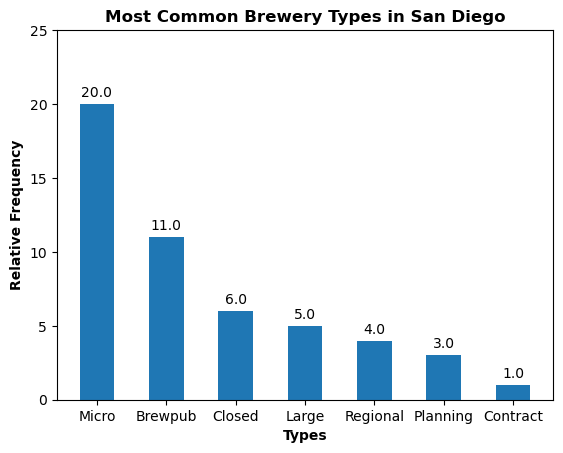

In [279]:
# List of brewery types and their corresponding counts
brewery_names = ['Micro', 'Brewpub', 'Closed', 'Large', 'Regional', 'Planning', 'Contract']
brewery_amounts = [20, 11, 6, 5, 4, 3, 1]

# Create a bar plot for the brewery types and their counts
fig, ax = plt.subplots()

# Creates bar chart
bar_container = ax.bar(brewery_names, brewery_amounts, width=0.5)

# Creates y axis in bold
ax.set_ylabel('Relative Frequency', fontweight='bold')

# Creates x axis in bold
ax.set_xlabel('Types', fontweight='bold')

# Creates title in specific size and bold
ax.set_title('Most Common Brewery Types in San Diego', fontsize=12, fontweight='bold')

# Sets the limit for the y axis
ax.set(ylim=(0, 25))

ax.bar_label(bar_container, fmt='{:,.1f}', padding=3)


In [ ]:
"The bar chart displays the different types of breweries in San Diego, showing the relative frequency of each type. The x-axis"
"represents the brewery types, and the y-axis shows the number of breweries in each category. The categories include Microbreweries, "
"Brewpubs, Closed breweries, Large breweries, Regional breweries, breweries 'Planning' to open, and Contract breweries."

In [ ]:
'''Feedback'''

'''Formatting bolded words and headers to make things look more clear - Jack & Sean''' 

''' My response: thank you for the feedback, I will take note on that'''

'''I used the feed back to change the size and bold the letters of the x-axis, y-axis, and title of the graph to make it more clear
and have better visualization.'''